In [17]:
!pip install psycopg2 
from sqlalchemy import create_engine 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Import the SQL database into Pandas.

In [2]:
engine = create_engine('postgresql://<username>:<password>@localhost:5432/<database_name>')
conn = engine.connect()

In [3]:
#assigning tables to names
employees = pd.read_sql_table("employees", conn)
departments = pd.read_sql_table("departments", conn)
dept_emp = pd.read_sql_table("dept_emp", conn)
dept_manager = pd.read_sql_table("dept_manager", conn)
salaries = pd.read_sql_table("salaries", conn)
titles = pd.read_sql_table("titles", conn)

In [4]:
employees.head(1)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28


In [5]:
titles.head(1)

,title_id,title
0,s0001,Staff


In [6]:
departments.head(1)

,dept_no,dept_name
0,d001,Marketing


In [7]:
dept_emp.head(1)

,emp_no,dept_no
0,10001,d005


In [8]:
salaries.head(1)

,emp_no,salary
0,10001,60117


# 2. Create a histogram to visualize the most common salary ranges for employees.

In [9]:
merge = employees.merge(salaries, on = "emp_no", how = "inner")

In [10]:
merge

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


In [11]:
emp_salary = merge.loc[:,['emp_no','salary']].copy()
emp_salary.head(1)


,emp_no,salary
0,473302,40000


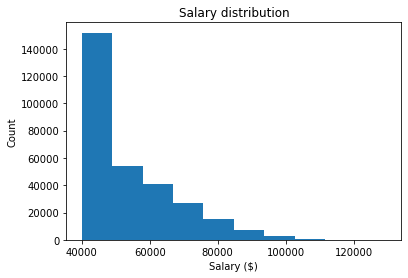

In [58]:
plt.hist(emp_salary['salary'])
plt.xlabel('Salary ($)')
plt.ylabel('Count')
plt.title('Salary distribution')
plt.show()

# 3. Create a bar chart of average salary by title.

In [13]:
title_merge = merge.merge(titles, left_on = 'emp_title_id',right_on = 'title_id', how = 'inner')
title_merge.head(1)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff


In [60]:
group_salary = title_merge.groupby("title")["salary"].mean()

g_salary = group_salary.to_frame().reset_index()

x = list(g_salary['title'])

y = list(g_salary['salary'])

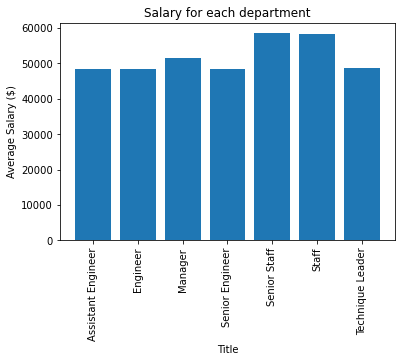

In [61]:
xs = np.arange(len(x))

plt.xticks(xs, x, rotation='vertical')
plt.title('Salary for each department')
plt.bar(xs,y)
plt.ylabel('Average Salary ($)')
plt.xlabel('Title')

plt.show()